In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/neo-stark-team/Datasets/main/Mall_Customers.csv",names=['cust_id','gender','age','income','Spending_Score'],skiprows=1)
data

,cust_id,gender,age,income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.isnull().sum()

cust_id           0
gender            0
age               0
income            0
Spending_Score    0
dtype: int64

In [ ]:
#q3
q3=data.income.quantile(.75)

q1=data.income.quantile(.25)

iqr=q3-q1
print("iqr:",iqr)



iqr: 36.5


In [ ]:
lower_limit=q1-1.5*iqr
print("lower:",lower_limit)

lower: -13.25


In [ ]:
upper_limit=q3+1.5*iqr
print("upper:",upper_limit)

upper: 132.75


In [ ]:
outliers=data[~((data.income<lower_limit)|(data.income>upper_limit))]
outliers

,cust_id,gender,age,income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


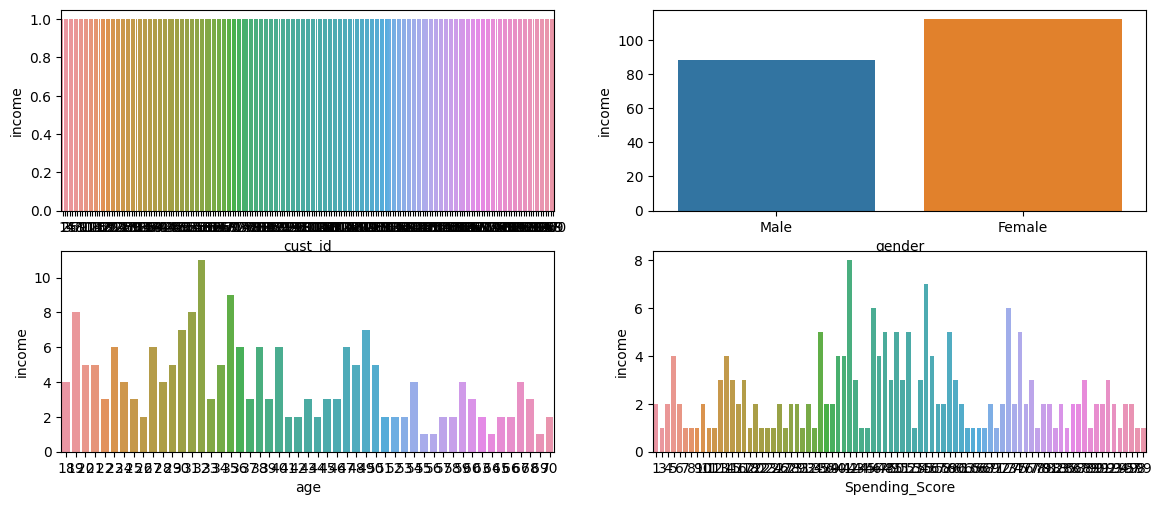

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
x = data.drop("income",axis=1)
plt.figure(figsize=(14,12))
for i, col in enumerate(x,1):
  plt.subplot(4,2,i)
  sns.countplot(data = data,x = col)
  plt.xlabel(col)
  plt.ylabel('income')
plt.show()

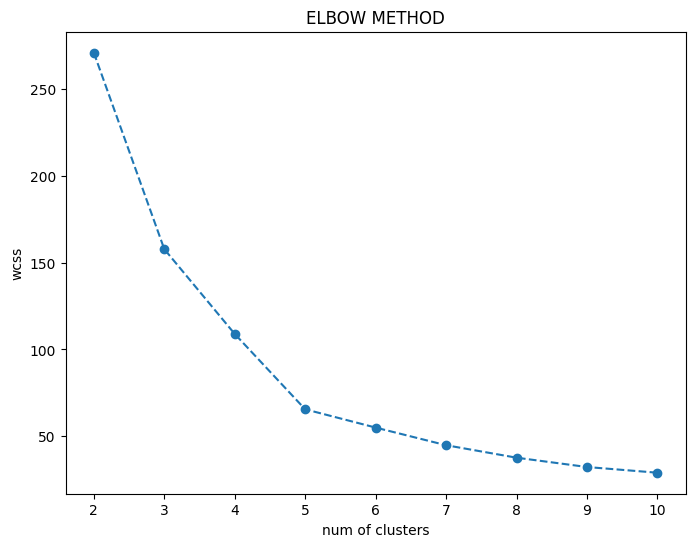

In [ ]:
from sklearn.preprocessing import StandardScaler
x=data[["income","Spending_Score"]]
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(x_scaler)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(2,11),wcss,marker="o",linestyle='--')
plt.title('ELBOW METHOD')
plt.xlabel("num of clusters")
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(x_scaler)

data["Cluster"]=kmeans.labels_

data

,cust_id,gender,age,income,Spending_Score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,6
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,7
197,198,Male,32,126,74,9
198,199,Male,32,137,18,7


In [ ]:
from sklearn.metrics import silhouette_score

sil_avg=silhouette_score(x,kmeans.labels_)
print("the average silhouette score is:",sil_avg)

the average silhouette score is: 0.4494755585987857


In [ ]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
model.fit(x)
labels=model.labels_
data['cluster']=labels
print(data.head())

   cust_id  gender  age  income  Spending_Score  Cluster  cluster
0        1    Male   19      15              39        2        4
1        2    Male   21      15              81        3        3
2        3  Female   20      16               6        6        4
3        4  Female   23      16              77        3        3
4        5  Female   31      17              40        2        4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
